<a href="https://colab.research.google.com/github/JavanTang/Learn-a-little-tensorflow-every-day/blob/master/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E2%80%94%E2%80%94Tensorflow%E5%AD%A6%E4%B9%A0%EF%BC%88%E4%BA%8C%EF%BC%89%E5%9B%BE%E7%89%87%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在开始之前多说一句，本系列的教程均以Tensorflow官方为主，主要是考虑到有些同学英语不好的基础，而且Tensorflow官方的教材也较为简单，对很多基础性的问题没有涉及到，当然作者我也是一个半桶水，我想把我在学习过程中遇到的一些问题进行汇总，总的来说我觉得也可以理解这个学习教材可以称为笔记，之后在每一章我都会将Tensorflow官方教材的地址贴出来。

**今天要上代码了，直接实战出效果**

## 图片分类

看下图，我们的第一个问题就是要将下面的图片进行一一分类，里面有一些裙子，鞋子什么的，衬衫什么的，我们现在要利用上一章学习的神经网络去解决这个问题，其实在神经网络还没有出来之前也都是用很多传统算法做这类工作，但是讲真比较麻烦，他们可能通过图片块的颜色反差的值来形成一个矩阵，然后将这些矩阵用统计学习的方法去做研究，打个比方就是下面图基本上占白色多的可能就是衣服（这里讲得比较通俗一点，没有参考文献），那现在我们有了Tensorflow类似的深度学习网络框架我们该怎么做勒，可能不到一百行。
![](https://tensorflow.org/images/fashion-mnist-sprite.png)


## 官方示例代码

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
# 数据直接放在keras.datasets.fashion_mnist中
fashion_dataset = keras.datasets.fashion_mnist
# load_data 返回了四个Number数组
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

In [0]:
# 上方train_label 与 test_labels 数组中存放的是index,比如为0就是上衣T恤，1就是裤子以此类推。
class_names = ['上衣/T恤', '裤子', '套衫',
               '裙子', '外套', '凉鞋', '衬衫', '运动鞋', '包包', '踝靴']

In [0]:
# 这个命令是输出它矩阵的形状，例如 3*3*3 的矩阵，5*5的矩阵。
print(train_images.shape)
# 这个输出的结果是60000*28*28的矩阵，有60000个样本，每一个样本是28*28，我们可以看上方的图片
# ，每个图片是由28*28个像素组成的，给神经网络的数据我们都是喂给它吃数值型的。

(60000, 28, 28)


In [74]:
# 我们查看一下里面的像素点，这里的像素点都是0-255直接
print(train_images[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.55686275 0.78431373 0.41568627 0.
  0.         0.         0.         0.         0.         0.
  0.33333333 0.7254902  0.43921569 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607843 0.83921569 0.85098039 0.76078431 0.9254902  0.84705882
  0.73333333 0.58431373 0.52941176 0.6        0.82745098 0.85098039
  0.90588235 0.80392157 0.85098039 0.7372549  0.13333333 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882353
  0.7254902  0.65098039 0.70588235 0.70980392 0.74509804 0.82745098
  0.86666667 0.77254902 0.57254902 0.77647059 0.80784314 0.74901961
  0.65882353 0.74509804 0.6745098  0.7372549  0.68627451 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.52941176
  0.6        0.62745098 0.68627

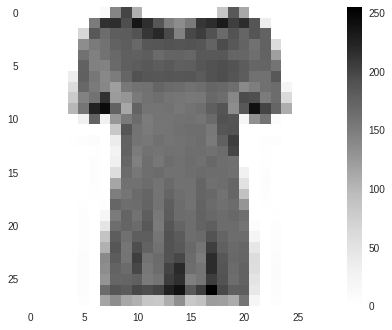

In [0]:
# 我们使用matplotlib去打印出它，可以将这些数值转换成为图片
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)

In [0]:
# 我们需要将所有的数值转换成为0-1类型的值

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# 现在开始构建模型，通常我们创建了模型，就相当于我们设计了一个智能机器人，然后之后的工作就是喂它吃数据

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 我们传入的单个样本是28*28的，Flatten作用就是将这个矩阵转换称为一位数组
# Dense就是全连接层，暂时不做主要的了解，只需要了解28*28=784，784个数字
# 进到keras.layers.Dense(128, activation=tf.nn.relu)之后出来就是
# 128个数字，然后第接着最后出来就是10个数字，依次为class_names中每一类的
# 可能性。

也就是说model这个小机器人，它吃一个28*28的数据之后可以拉出来一个10个数字，10个数字分别代表每一个类型的概率。

In [0]:
# 现在要进行编译模型，这个过程就是给它吃数据

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# optimization为优化器
# loss为损失函数
# metrics为提取标准

In [0]:
# 开始正式吃数据，epoch是用原有数据反复训练的次数，理解成羊吃草吧
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2800 - acc: 0.8967
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2670 - acc: 0.9004
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2558 - acc: 0.9046
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2463 - acc: 0.9076
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2388 - acc: 0.9117


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3501 - acc: 0.8745
Test accuracy: 0.8745


上面基本上就跑完了官方的教材了，涉及了几个知识点：
1. 数据分割成训练集，测试集。
2. 如果将图片显示出来。
3. 像素点的大小。
4. 创建简单的神经网络。
5. Flatten与Dense的意义。
6. 优化器。
7. 损失函数。
8. metrics。

## 作业

1. 自己从网上下载一个图片并用你创建好的神经网络去预测图片类型，比如你可以下载一张T恤的图片或者鞋子只要是在classname中的类型就可以，看看结果怎么样，如果结果不理想分析一下问题是什么？
2. 将代码反复敲三遍，敲代码，不敲几遍怎么熟练呢。
3. 为什么要分割成训练集与测试集。
4. model.compile中metrics的意义是什么？

## 第一问题的解答

目前这一部分先不要，先自己动手解决作业的问题，基本上2-3个小时就可以自己动手解决。
![](http://wx4.sinaimg.cn/mw600/007uWeI8ly1g1o4pg65jtj30g20g5dol.jpg)

思路：
1. 下载一个图片
2. 用`Reference【4】在线图片工具`去改变图片的尺寸
3. 找一个image转换成数组
4. 丢到模型里面去


In [0]:
# 网上Copy的图片转数组

def jpg_image_to_array(image_path):
  """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
  with Image.open(image_path) as image:         
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3))                                   
  return im_arr

# 网上Copy的rgb转灰度图
# convert rgb (224,224,3 ) to gray (224,224) image
def rgb2gray(rgb):
        return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]) #分别对应通道 R G B

# 如果没做出来并看到这一步，作业再加三题
# 什么是RGB，
# 什么是灰度图
# 读取RGB与读取灰度图有什么不同

In [99]:
my_operator = Operation()
  
test_img = rgb2gray(jpg_image_to_array('333.jpeg'))
print(test_img.shape)

test_img = test_img / 255.0

prediction = model.predict(test_img.reshape(1, 28, 28))

print(class_names[np.argmax(prediction)])

(28, 28)
包包


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


我用图片中用了一个T恤但是却被识别成了包包，然后我们这个时候就需要分析为什么，我在下面show了这张图片，于是我们发现这个T恤的整体颜色和上面训练的是不一样的。

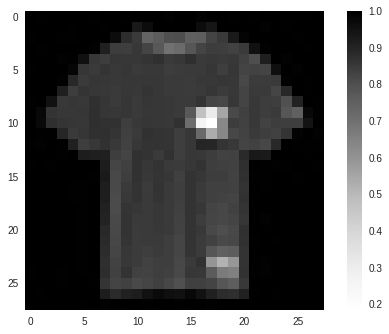

In [100]:
plt.figure()
plt.imshow(test_img)
plt.colorbar()
plt.grid(False)

这里我用255-test_img将它的像素值倒转过来

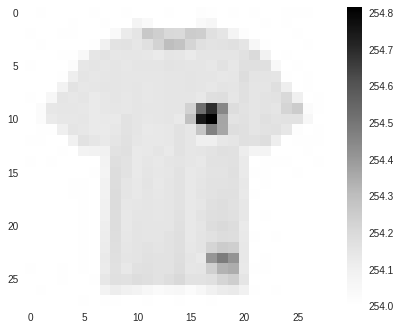

In [86]:
plt.figure()
plt.imshow(255 - test_img)
plt.colorbar()
plt.grid(False)

In [95]:
my_operator = Operation()
  
test_img = rgb2gray(jpg_image_to_array('333.jpeg'))
print(test_img.shape)

test_img = (255 - test_img) / 255.0

prediction = model.predict(test_img.reshape(1, 28, 28))
prediction_index = np.argmax(prediction)
print(('预测结果：%s，%d%%') %(class_names[prediction_index], prediction[0][prediction_index] * 100))

(28, 28)
预测结果：上衣/T恤，48%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


到此为止，识别正确，OK结束。

## Reference

1. [tensorflow官方教程](https://www.tensorflow.org/tutorials/keras/basic_classification)
2. [jpg_image_to_array方法来自stackOverflow](https://stackoverflow.com/questions/13550376/pil-image-to-array-numpy-array-to-array-python)
3. [rgb2gray方法](https://blog.csdn.net/WJ_MeiMei/article/details/86616565)
4. [在线改变图片尺寸](https://www.yasuotu.com/size)
